# Анализ отзывов ресторанов

## 1. Предобработка данных и анализ текста

### 1.1. Импорт библиотек и загрузка данных

In [2]:
!pip install nltk

     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ----------- ---------------------------- 0.4/1.5 MB 8.7 MB/s eta 0:00:01
   ------------------ --------------------- 0.7/1.5 MB 8.8 MB/s eta 0:00:01
   ---------------------------------------  1.5/1.5 MB 10.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 10.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/268.5 kB ? eta -:--:--
   --------------------------------------- 268.5/268.5 kB 16.1 MB/s eta 0:00:00


In [3]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

In [4]:
# Загрузка необходимых ресурсов для NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akhim\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akhim\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akhim\AppData\Roaming\nltk_data...


True

In [5]:
# Загрузка датасета
with open('./DataSet/yelp_academic_dataset_review.json', 'r', encoding='utf-8') as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)

### 1.2. EDA (Исследовательский анализ данных)

In [6]:
# Просмотр первых строк датасета
print("Первые 5 строк датасета:")
print(df.head())

Первые 5 строк датасета:
                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0    3.0       0      0     0   
1    5.0       1      0     1   
2    3.0       0      0     0   
3    5.0       1      0     1   
4    4.0       1      0     1   

                                                text                 date  
0  If you decide to eat here, just be aware it is...  2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year...  2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm...  2014-02-05 20:30:30  
3  Wow!  

In [7]:
# Информация о датасете
print("\nИнформация о датасете:")
print(df.info())


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 480.0+ MB
None


In [8]:
# Статистическое описание числовых столбцов
print("\nСтатистическое описание числовых столбцов:")
print(df.describe())


Статистическое описание числовых столбцов:
              stars        useful         funny          cool
count  6.990280e+06  6.990280e+06  6.990280e+06  6.990280e+06
mean   3.748584e+00  1.184609e+00  3.265596e-01  4.986175e-01
std    1.478705e+00  3.253767e+00  1.688729e+00  2.172460e+00
min    1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00
25%    3.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
50%    4.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
75%    5.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
max    5.000000e+00  1.182000e+03  7.920000e+02  4.040000e+02


In [9]:
# Проверка на наличие пропущенных значений
print("\nПроверка на наличие пропущенных значений:")
print(df.isnull().sum())


Проверка на наличие пропущенных значений:
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64


In [10]:
# Анализ распределения классов (звезды в отзывах)
print("\nРаспределение классов (звезды в отзывах):")
print(df['stars'].value_counts())


Распределение классов (звезды в отзывах):
stars
5.0    3231627
4.0    1452918
1.0    1069561
3.0     691934
2.0     544240
Name: count, dtype: int64


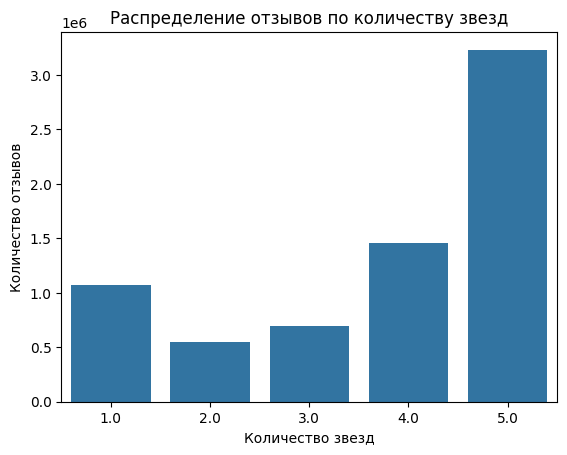

In [11]:
# Визуализация распределения классов
sns.countplot(x='stars', data=df)
plt.title('Распределение отзывов по количеству звезд')
plt.xlabel('Количество звезд')
plt.ylabel('Количество отзывов')
plt.show()

### 1.3. Предобработка данных

In [12]:
# Удаление дубликатов
print(f"Количество дубликатов до удаления: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Количество дубликатов после удаления: {df.duplicated().sum()}")

Количество дубликатов до удаления: 0
Количество дубликатов после удаления: 0


In [13]:
# Очистка текста от лишних символов
def clean_text(text):
    text = text.lower()  # Приведение текста к нижнему регистру
    text = re.sub(r'<.*?>', '', text)  # Удаление HTML-тегов
    text = re.sub(r'[^\w\s]', '', text)  # Удаление знаков препинания
    text = re.sub(r'\d+', '', text)  # Удаление чисел
    return text

In [14]:
df['cleaned_text'] = df['text'].apply(clean_text)

In [15]:
# Токенизация текста
df['tokens'] = df['cleaned_text'].apply(word_tokenize)

In [16]:
# Удаление стоп-слов и лемматизация
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [17]:
def preprocess_text(tokens):
    tokens = [word for word in tokens if word not in stop_words]  # Удаление стоп-слов
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Лемматизация
    return tokens

In [18]:
df['processed_tokens'] = df['tokens'].apply(preprocess_text)

In [19]:
# Вывод первых 5 строк после предобработки
print(df[['cleaned_text', 'tokens', 'processed_tokens']].head())

                                        cleaned_text  \
0  if you decide to eat here just be aware it is ...   
1  ive taken a lot of spin classes over the years...   
2  family diner had the buffet eclectic assortmen...   
3  wow  yummy different  delicious   our favorite...   
4  cute interior and owner  gave us tour of upcom...   

                                              tokens  \
0  [if, you, decide, to, eat, here, just, be, awa...   
1  [ive, taken, a, lot, of, spin, classes, over, ...   
2  [family, diner, had, the, buffet, eclectic, as...   
3  [wow, yummy, different, delicious, our, favori...   
4  [cute, interior, and, owner, gave, us, tour, o...   

                                    processed_tokens  
0  [decide, eat, aware, going, take, hour, beginn...  
1  [ive, taken, lot, spin, class, year, nothing, ...  
2  [family, diner, buffet, eclectic, assortment, ...  
3  [wow, yummy, different, delicious, favorite, l...  
4  [cute, interior, owner, gave, u, tour, upcomin..

In [20]:
# Сохранение предобработанных данных
df.to_csv('cleaned_reviews.csv', index=False)